In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, Dict, draw, MetalGUI
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

design=designs.DesignPlanar()
design.overwrite_enabled=True
gui=MetalGUI(design)

In [3]:
options_pocket=dict(padwidth='425 um',
                    pocket_height='650 um',
                    connection_pads=dict(a=dict(loc_W=+1, loc_H=+1),
                                         b=dict(loc_W=-1, loc_H=+1, pad_height='30 um'),
                                         c=dict(loc_W=+1, loc_H=-1, pad_width='200 um'),
                                         d=dict(loc_W=-1, loc_H=-1, pad_width='50 um')))

q1=TransmonPocket(design, 'Q1', options=dict(pos_x='+2.55 mm', pos_y='+0.0 mm', **options_pocket))
q2=TransmonPocket(design, 'Q2', options=dict(pos_x='+0.0 mm', pos_y='-0.9 mm', orientation='90', **options_pocket))
q3=TransmonPocket(design, 'Q3', options=dict(pos_x='-2.55 mm', pos_y='+0.0 mm', **options_pocket))
q4=TransmonPocket(design, 'Q4', options=dict(pos_x='+0.0 mm', pos_y='+0.9 mm', orientation='90', **options_pocket))

gui.rebuild()
gui.autoscale()
gui.toggle_docks(do_hide=None)

05:15PM 17s WARNING [check_lengths]: For path table, component=cpw1, key=trace has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 17s WARNING [check_lengths]: For path table, component=cpw1, key=cut has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.


05:15PM 17s WARNING [check_lengths]: For path table, component=cpw2, key=trace has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 17s WARNING [check_lengths]: For path table, component=cpw2, key=cut has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 17s WARNING [check_lengths]: For path table, component=cpw3, key=trace has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 18s WARNING [check_lengths]: For path table, component=cpw3, key=cut has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 18s WARNING [check_lengths]: For path table, component=cpw4, key=trace has short segments that could cause issues with fillet. Values in (19-19)  are index(es) in shapely geometry.
05:15PM 18s WARNING [check_lengths]: For path table, compon

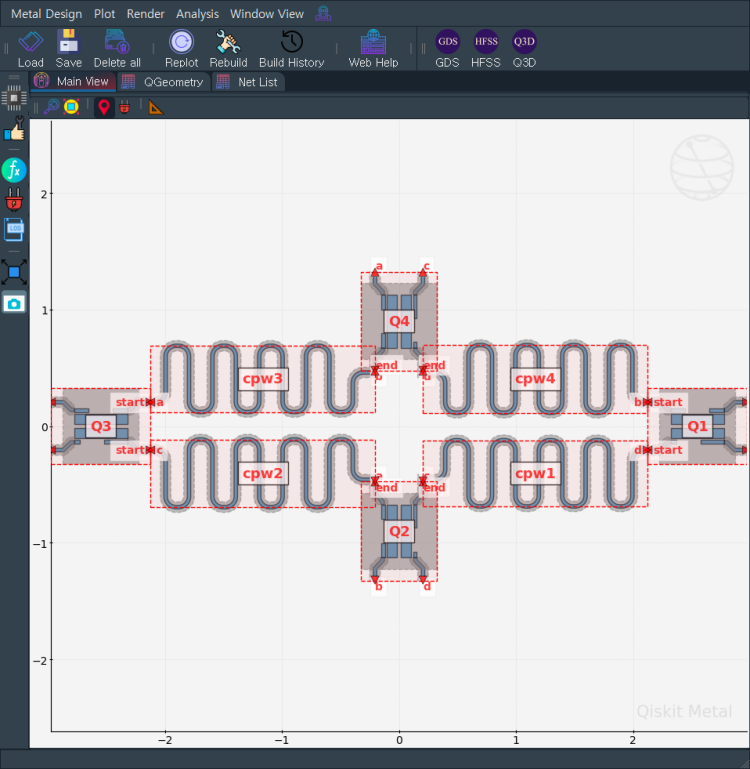

In [8]:
options_meander=Dict(meander=Dict(lead_start='0.1 mm',
                                  lead_end='0.1 mm',
                                  asymmetry='0 um'))

def connect(component_name:str, component1:str, pin1:str, component2:str, pin2: str, 
            length: str, asymmetry='0 um', flip=False):
    myoptions=Dict(pin_inputs=Dict(start_pin=Dict(component=component1, pin=pin1),
                                   end_pin=Dict(component=component2, pin=pin2)),
                   lead=Dict(start_straight='0.13 mm'),
                   total_length=length,
                   fillet='90 um')
    myoptions.update(options_meander)
    myoptions.meander.asymmetry=asymmetry
    myoptions.meander.lead_direction_inverted='true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

'''
https://github.com/mewwts/addict/blob/master/README.md
Dict() enables user to simply call back the key and redefine its value with '.'
'''

asym=200
cpw1=connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym} um')
cpw2=connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym} um', flip=True)
cpw3=connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym} um')
cpw4=connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym} um', flip=True)

gui.rebuild()
gui.autoscale()
gui.toggle_docks(True)
gui.highlight_components(['Q1','Q2','Q3','Q4','cpw1','cpw2','cpw3','cpw4'])
gui.screenshot()

In [20]:
design.variables.cpw_width='30 um'
design.variables.cpw_gap='30 um'
gui.rebuild()
gui.autoscale()

In [18]:
cpw1.options.lead.end_straight='100 um'
cpw2.options.lead.end_straight='100 um'
cpw3.options.lead.end_straight='100 um'
cpw4.options.lead.end_straight='100 um'

gui.rebuild()
gui.autoscale()

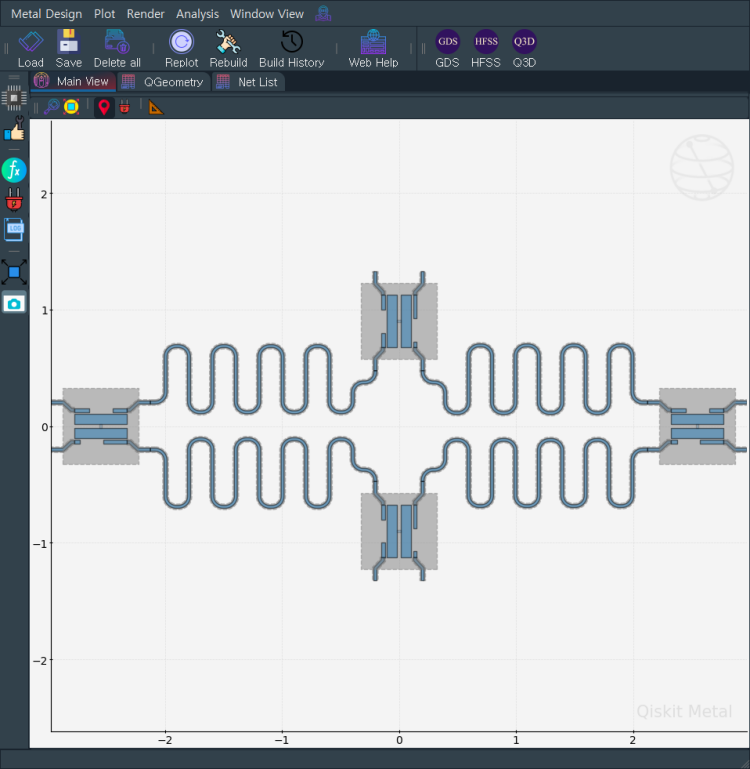

In [24]:
design.variables.pad_width='450 um'
design.variables.cpw_width='25 um'
design.variables.cpw_gap='12 um'

q1.options.pad_width='pad_width'
q2.options.pad_width='pad_width'
q3.options.pad_width='pad_width'
q4.options.pad_width='pad_width'

gui.rebuild()
gui.autoscale()
gui.screenshot()